In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load Data

In [2]:
if __name__ == '__main__':
    df = pd.read_csv("breast-cancer-wisconsin.data", header=None)
    df = df.iloc[:,1:10]
    df = df[df.iloc[:,5] != '?']
    df = df.to_numpy()
    df = df.astype(np.float)
    #df[:,0] = (df[:,0] - np.mean(df[:,0])) / np.std(df[:,0])
    print(df[:5])

[[ 5.  1.  1.  1.  2.  1.  3.  1.  1.]
 [ 5.  4.  4.  5.  7. 10.  3.  2.  1.]
 [ 3.  1.  1.  1.  2.  2.  3.  1.  1.]
 [ 6.  8.  8.  1.  3.  4.  3.  7.  1.]
 [ 4.  1.  1.  3.  2.  1.  3.  1.  1.]]


# Define Function

In [3]:
def plot_l(k, l):
    plt.plot(k, l)
    plt.title("Plot of L(k)")
    plt.ylabel("L(k)")
    plt.xlabel("k")
    plt.show()

def kmeans(data, k):
    rows = data.shape[0]
    # store the centroids
    centers = data[np.sort(np.random.choice(rows,size=k,replace=False))]
    # store the dist, the new centroids, the old centroids
    arr = np.zeros((rows,3))
    diff = True
    while diff:
        diff = False
        for i in range(rows):
            dist = np.array([])

            for j in range(k):
                # distance for each obs towards each centroid
                dist = np.append(dist, np.square(data[i,:] - centers[j,:]).sum())
                arr[i,0], arr[i,1] = dist.min(), np.argmin(dist)

        # check if there is an empty cluster
        dic = Counter(arr[:,1])
        if min(dic.values()) == 0:
            temp = sorted(dic, key=lambda k: dic[k])
            # split the largest cluster
            size = dic[temp[-1]]//2
            while size > 0:
                for i in range(rows):
                    if arr[i,1] == temp[-1]:
                        arr[i,1] = temp[0]
                        size -= 1

            # determine the convergence
        if np.not_equal(arr[:,1], arr[:,2]).sum() != 0:
            diff, arr[:,2] = True, arr[:,1]
            # update centroids
            for j in range(k):
                centers[j,:] = np.mean(data[np.squeeze(np.argwhere(arr[:,2] == j))], axis=0)

    return arr[:,0].sum()

# Training

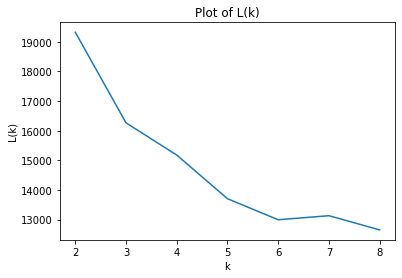

In [4]:
if __name__ == "__main__":
    arr_k = [i for i in range(2,9)]
    arr_l = []
    for k in arr_k:
        arr_l.append(kmeans(df, k))
    plot_l(arr_k, arr_l)